# EPRV 6: Sun-as-a-Star Splinter Part I

## Tutorial: Download KPF solar data from the Keck Observatory Archive

This tutorial shows how to download KPF solar data using the KOA Python API. To install PyKOA

https://koa.ipac.caltech.edu/UserGuide/PyKOA/PyKOA.html

pip install --upgrade pykoa

Requires Python 3.6 (or above), plus table read and write functions from Astropy.

Also, see the official tutorial from Keck here, with more examples for accessing all types of calibration data: https://koa.ipac.caltech.edu/UserGuide/PyKOA/notebooks/PyKOA_KPF_introduction.ipynb

The number of records returned by each query may differ from the number returned in this Notebook because new data are made public daily
    
PyKOA supports several output table formats, which are selected with the 'format' field. These formats are: IPAC (column delimited ASCII; default), VOTable, CSV, and TSV. All the examples below deliver output in IPAC format.

In [ ]:
import io
import os
import sys
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pykoa.koa import Koa 
from astropy.io import fits
from astropy.time import Time
from astropy.table import Table, Column

Details about KOA

In [4]:
help(Koa)

Help on Archive in module pykoa.koa.core object:

class Archive(builtins.object)
 |  Archive(**kwargs)
 |  
 |  The 'Archive' class provides functions for accessing data stored in the 
 |  Keck Observatory Archive (KOA). Queries are performed via the nexsciTAP
 |  server.
 |  
 |  Keck PIs can use the KOA credentials assigned to them when data were 
 |  acquired (given at login) to search for their proprietary data.
 |  
 |  Example:
 |  --------
 |  
 |  import os
 |  import sys 
 |  
 |  from pykoa.koa import Koa 
 |  
 |  Koa.query_datetime ('hires',         '2018-03-16 00:00:00/2018-03-18 00:00:00',         outpath= './meta.xml',         format='ipac')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      'init' method initializes the class with optional debugfile flag.
 |      
 |      Optional inputs:
 |      ----------------
 |      debugfile: a file path for the debug output
 |  
 |  download(self, metapath, format, outdir, **kwargs)
 |      'download' method

Specify and create the output directory.

In [6]:
outdir = 'sun_kpf_l2/'
os.makedirs(outdir, exist_ok=True)

# Query by date or datetime range

In [16]:
# These will return all KPF files during the given date/time

# query a specific UTC date/time range
Koa.query_datetime(instrument='kpf',
   datetime='2024-06-03 18:30:00/2024-06-03 22:30:00', # UTC
    outpath=f'{outdir}/datetime.kpf.tbl', 
    format='ipac')

# or query the full UTC date
# Koa.query_date(instrument='kpf',
#     date='2024-06-03',
#     outpath=f'{outdir}/datetime.kpf.tbl', 
#     format='ipac')

rec = Table.read (f'{outdir}/datetime.kpf.tbl',format='ipac')
print (rec)

submitting request...
Result downloaded to file [sun_kpf_l2//datetime.kpf.tbl]
          koaid                     ofname          ...   semid   propint
------------------------- ------------------------- ... --------- -------
KP.20240603.66801.58.fits KP.20240603.66801.58.fits ... 2024a_eng       0
KP.20240603.66855.18.fits KP.20240603.66855.18.fits ... 2024a_eng       0
KP.20240603.66908.81.fits KP.20240603.66908.81.fits ... 2024a_eng       0
KP.20240603.66962.42.fits KP.20240603.66962.42.fits ... 2024a_eng       0
KP.20240603.67016.41.fits KP.20240603.67016.41.fits ... 2024a_eng       0
KP.20240603.67377.56.fits KP.20240603.67377.56.fits ... 2024a_eng       0
KP.20240603.67486.29.fits KP.20240603.67486.29.fits ... 2024a_eng       0
KP.20240603.67595.02.fits KP.20240603.67595.02.fits ... 2024a_eng       0
KP.20240603.67703.65.fits KP.20240603.67703.65.fits ... 2024a_eng       0
KP.20240603.67812.34.fits KP.20240603.67812.34.fits ... 2024a_eng       0
                      ...        

# Query by data type

In [18]:
# Now we can specify the type of data to query
param = dict()
param['instrument'] = 'kpf'
# param['target'] = 'autocal-bias'
param['target'] = 'Sun'
param['date'] ='2024-06-03' # can specify a date as well
# param['datetime'] = '2024-06-01 00:00:00/2024-06-30 23:59:59' # or date range

Koa.query_criteria (param, \
    f'{outdir}/solar.kpf.tbl', \
    format='ipac')

rec = Table.read(f'{outdir}/solar.kpf.tbl', format='ascii.ipac')
print (rec)


submitting request...
Result downloaded to file [sun_kpf_l2//solar.kpf.tbl]
          koaid                     ofname          ...   semid   propint
------------------------- ------------------------- ... --------- -------
KP.20240603.67952.54.fits KP.20240603.67952.54.fits ... 2024a_eng       0
KP.20240603.68013.06.fits KP.20240603.68013.06.fits ... 2024a_eng       0
KP.20240603.68073.68.fits KP.20240603.68073.68.fits ... 2024a_eng       0
KP.20240603.68134.39.fits KP.20240603.68134.39.fits ... 2024a_eng       0
KP.20240603.68194.98.fits KP.20240603.68194.98.fits ... 2024a_eng       0
KP.20240603.68255.63.fits KP.20240603.68255.63.fits ... 2024a_eng       0
KP.20240603.68316.19.fits KP.20240603.68316.19.fits ... 2024a_eng       0
KP.20240603.68376.79.fits KP.20240603.68376.79.fits ... 2024a_eng       0
KP.20240603.68437.53.fits KP.20240603.68437.53.fits ... 2024a_eng       0
KP.20240603.68498.16.fits KP.20240603.68498.16.fits ... 2024a_eng       0
                      ...           

## General Metadata Queries With the IVOA Astronomical Data Query Langage (ADQL).

A query made with ADQL enables general and complex queries against the archive. If you wish to download data discovered via ADQL, explicitly include the koaid, instrument, and filehandle in the query. Here's an example to count how many SoCal files are available

In [21]:
query ="select count(koaid) from koa_kpf  where (targname='Sun')" 

Koa.query_adql (query, \
    f'{outdir}/count_socal.tbl', overwrite=True, \
    format='ipac')

rec = Table.read(f'{outdir}/count_socal.tbl', format='ascii.ipac')
print(rec) 


submitting request...
Result downloaded to file [sun_kpf_l2//count_socal.tbl]
count(koaid)
------------
       99402


## Query for metadata and order by UT time.  


In [23]:
query ="select koaid, filehand, utdatetime from koa_kpf  where (targname='Sun') order by utdatetime" 

Koa.query_adql (query, \
    f'{outdir}/socal_info.tbl', overwrite=True, \
    format='ipac')

rec = Table.read(f'{outdir}/socal_info.tbl', format='ascii.ipac')
print (rec)

submitting request...
Result downloaded to file [sun_kpf_l2//socal_info.tbl]
          koaid           ...         utdatetime        
------------------------- ... --------------------------
KP.20230607.68050.40.fits ... 2023-06-07 18:54:10.070000
KP.20230607.68117.51.fits ... 2023-06-07 18:55:17.390000
KP.20230607.68184.64.fits ... 2023-06-07 18:56:24.200000
KP.20230607.68252.06.fits ... 2023-06-07 18:57:32.030000
KP.20230607.68319.05.fits ... 2023-06-07 18:58:38.840000
KP.20230607.68386.18.fits ... 2023-06-07 18:59:46.160000
KP.20230607.68453.12.fits ... 2023-06-07 19:00:52.970000
KP.20230607.68520.06.fits ... 2023-06-07 19:01:59.780000
KP.20230607.68587.17.fits ... 2023-06-07 19:03:07.100000
KP.20230607.68654.08.fits ... 2023-06-07 19:04:13.910000
                      ... ...                        ...
KP.20250628.74255.79.fits ... 2025-06-28 20:37:35.540000
KP.20250628.74316.42.fits ... 2025-06-28 20:38:36.230000
KP.20250628.74377.13.fits ... 2025-06-28 20:39:36.920000
KP.20250628

# Let's download a few

In [ ]:
# Using the query from above that gave us files for a specific day
Koa.download(f'{outdir}/solar.kpf.tbl',  
    format='ipac', 
    outdir=f'{outdir}/data', 
    # calibfile=1, # whether to also look for associated calibration files
    lev1file=1,   # whether to also download L1 spectra
    start_row=152, # let's only download 2 files since L0 are quite large (144 MB)
    end_row=153 
    )

Start downloading 2 koaid data you requested;
please check your outdir: sun_kpf_l2//data for  progress ....
Instrument [KPF] does not have level1 data.

A total of 0 new lev0 FITS files downloaded.


In [32]:
glob.glob(f'{outdir}/data/lev0/*fits')

['sun_kpf_l2//data/lev0/KP.20240603.77180.35.fits',
 'sun_kpf_l2//data/lev0/KP.20240603.77240.85.fits']

# Load the fits file

In [33]:
# Files
files = glob.glob(f'{outdir}/data/lev0/*fits')
Nfile = len(files)

hdu = fits.open(files[0])

In [35]:
for h in hdu:
    print(h.name)

PRIMARY
GREEN_AMP1
GREEN_AMP2
RED_AMP1
RED_AMP2
TELEMETRY
SOCAL PYRHELIOMETER


# Pyrheliometer data is saved in the L0 file

In [39]:
pyr = Table(hdu['SOCAL PYRHELIOMETER'].data).to_pandas()

pyr

,Date-Time,PYRIRRAD,PYRSENS,PYRTEMP,PYRVOLT
0,2024-06-03T21:26:20.3520,1087.95,7.717,8.3,8.396
1,2024-06-03T21:26:22.0236,1087.90,7.717,8.3,8.397
2,2024-06-03T21:26:23.0240,1088.45,7.717,8.3,8.400
3,2024-06-03T21:26:24.0246,1088.23,7.717,8.3,8.398
4,2024-06-03T21:26:26.0235,1087.96,7.717,8.3,8.394
5,2024-06-03T21:26:27.0304,1088.37,7.717,8.3,8.396
6,2024-06-03T21:26:29.0250,1089.40,7.717,8.3,8.405
7,2024-06-03T21:26:30.0267,1089.00,7.717,8.3,8.404
8,2024-06-03T21:26:32.0265,1089.05,7.717,8.4,8.404
9,2024-06-03T21:26:32.0282,1089.05,7.717,8.3,8.404


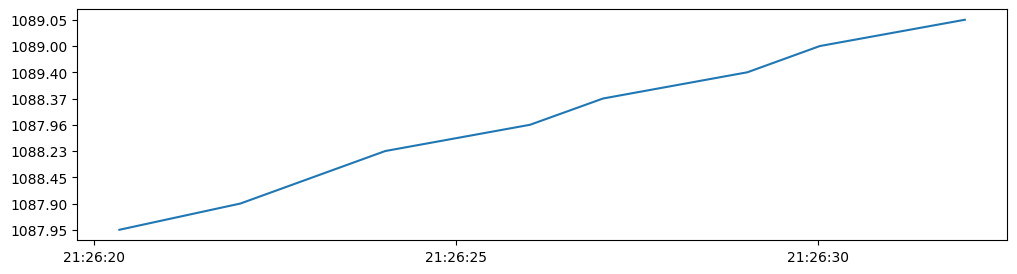

In [50]:
pyrdts = Time([Time(dtstr, format='isot') for dtstr in pyr['Date-Time'].values]).to_datetime()

plt.figure(figsize=(12,3))
plt.plot(pyrdts, pyr['PYRIRRAD'])

# Plot the raw L0 images

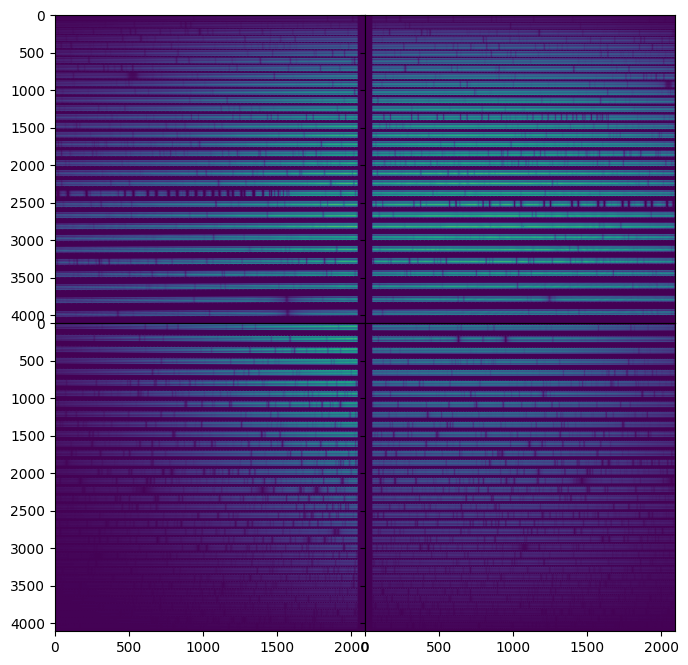

In [64]:
fig, axes = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True, 
                         gridspec_kw={'hspace':0, 'wspace':0})

axes[0,0].imshow(hdu['RED_AMP1'].data  , origin='lower', aspect='auto')
axes[0,1].imshow(hdu['RED_AMP2'].data  , origin='lower', aspect='auto')
axes[1,0].imshow(hdu['GREEN_AMP1'].data, origin='upper', aspect='auto')
axes[1,1].imshow(hdu['GREEN_AMP2'].data, origin='upper', aspect='auto')


# 2D, L1, L2 data products coming soon 

The KPF Pipeline was recently restarted on KOA, so data are currently being generated.

The pipeline is available here: https://github.com/Keck-DataReductionPipelines/KPF-Pipeline

and documentation for setting up your own environment to run it: https://kpf-pipeline.readthedocs.io/en/latest/

There are also many tutorials there for opening the various data products and reading/plotting their contents